In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [302]:
df = pd.read_csv('./Data/macrodata.csv')

In [303]:
pd.to_datetime(df['Unnamed: 0'])

0     1959-03-31
1     1959-06-30
2     1959-09-30
3     1959-12-31
4     1960-03-31
         ...    
198   2008-09-30
199   2008-12-31
200   2009-03-31
201   2009-06-30
202   2009-09-30
Name: Unnamed: 0, Length: 203, dtype: datetime64[ns]

In [304]:
df

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9/30/2008,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,12/31/2008,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,3/31/2009,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,6/30/2009,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [305]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

In [306]:
df.rename(columns = {'Unnamed: 0' : 'date'}, inplace=True)

In [307]:
df.index = df['date']

In [308]:
features = df.drop(['date','year','quarter'],axis=1)

In [309]:
target = df[['realgdp']]

In [310]:
features = features.drop(['realgdp'], axis=1)

In [312]:
n_obs = 30

In [313]:
x_train = features.iloc[:-n_obs]
y_train = target.iloc[:-n_obs]
x_test = features.iloc[-n_obs:]
y_test = target.iloc[-n_obs:]

In [84]:
x_train

,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,
1959-03-31,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...
2001-03-31,7744.3,1882.691,710.403,8296.5,176.40,1114.9,4.39,4.2,284.550,1.82,2.57
2001-06-30,7773.5,1876.650,725.623,8273.7,177.40,1139.7,3.54,4.4,285.267,2.26,1.28
2001-09-30,7807.7,1837.074,730.493,8484.5,177.60,1166.0,2.72,4.8,286.047,0.45,2.27


# Scaling

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
scaler = MinMaxScaler()

In [206]:
scaled_x = scaler.fit_transform(x_train)

In [207]:
scaled_y = scaler.fit_transform(y_train)

In [208]:
in_seq = scaled_x.reshape((len(scaled_x), 11))

In [209]:
out_seq = scaled_y.reshape((len(scaled_y), 1))

In [210]:
dataset = np.hstack((in_seq, out_seq))

In [211]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_idx = i + n_steps
        if end_idx > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_idx, :-1], sequences[end_idx-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [212]:
X, y = split_sequences(dataset, 3)

In [213]:
n_steps, n_features = 3, X.shape[2]

# Modeling

In [272]:
from tensorflow.keras.layers import Dense, LSTM, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [220]:
inputs = Input(shape=(n_steps, n_features))
l = LSTM(150, activation='tanh')(inputs)
d = Dense(1)(l)

In [221]:
model = Model(inputs, d)

In [222]:
model.compile(loss='mse',optimizer='adam')

In [223]:
es = EarlyStopping(monitor = 'loss', patience=5)

In [224]:
hist = model.fit(X, y, epochs=200, callbacks=[es])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 0.1299
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 8.6725e-04
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 6.6319e-04
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 5.1760e-04
Epoch 13/200
6/6 [==============================]

6/6 [==============================] - 0s 2ms/step - loss: 4.5660e-05
Epoch 101/200
6/6 [==============================] - 0s 2ms/step - loss: 4.3387e-05
Epoch 102/200
6/6 [==============================] - 0s 2ms/step - loss: 4.2909e-05
Epoch 103/200
6/6 [==============================] - 0s 2ms/step - loss: 4.1171e-05
Epoch 104/200
6/6 [==============================] - 0s 2ms/step - loss: 4.0635e-05
Epoch 105/200
6/6 [==============================] - 0s 2ms/step - loss: 4.2548e-05
Epoch 106/200
6/6 [==============================] - 0s 2ms/step - loss: 3.9873e-05
Epoch 107/200
6/6 [==============================] - 0s 2ms/step - loss: 4.0951e-05
Epoch 108/200
6/6 [==============================] - 0s 2ms/step - loss: 4.0965e-05
Epoch 109/200
6/6 [==============================] - 0s 2ms/step - loss: 3.8992e-05
Epoch 110/200
6/6 [==============================] - 0s 2ms/step - loss: 3.8602e-05
Epoch 111/200
6/6 [==============================] - 0s 2ms/step - loss: 3.8466e-05
Epoch 

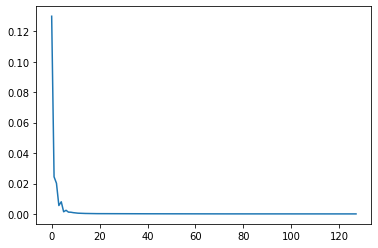

In [225]:
plt.plot(hist.history['loss'])

In [248]:
x_test_seq = scaler.fit_transform(x_test)
y_test_seq = scaler.fit_transform(y_test)

In [249]:
in_seq[0]

array([0.00000000e+00, 1.54278713e-02, 2.76613868e-02, 0.00000000e+00,
       0.00000000e+00, 9.51203272e-05, 7.94701987e-02, 3.28767123e-01,
       0.00000000e+00, 2.30931089e-01, 3.30275229e-01])

In [251]:
testset = np.hstack((x_test_seq, y_test_seq))

In [252]:
seq_x_test, seq_y_test = split_sequences(testset, 3)

In [255]:
predict = model.predict(seq_x_test)

In [261]:
predict = scaler.inverse_transform(predict)

In [267]:
predict_df = pd.DataFrame(data=predict, index=y_test[:-2].index)

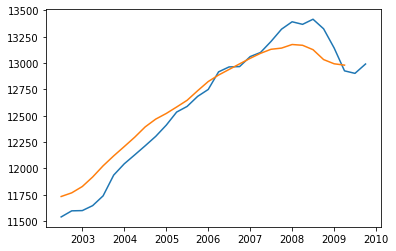

In [268]:
plt.plot(y_test, label='True value')
plt.plot(predict_df, label='Predictions')

In [269]:
from sklearn.metrics import mean_squared_error

In [271]:
np.sqrt(mean_squared_error(y_test[:-2], predict_df))

165.66167914437662

# Timeseries Generator

In [335]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, LSTM, Input
from tensorflow.keras.models import Model

In [316]:
df.drop(['date','year','quarter'], axis=1, inplace=True)

In [321]:
n_obs= 30

In [323]:
train = df.iloc[:-n_obs]
test = df.iloc[-n_obs:]

In [326]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)

In [333]:
length = 36
batch_size = 1
gen = TimeseriesGenerator(scaled_train, scaled_train, length=length,
                         batch_size=batch_size)

In [336]:
scaled_train.shape

(173, 12)

In [364]:
inputs = Input(shape=(length, scaled_train.shape[1]))
x = LSTM(50, return_sequences=True)(inputs)
x = LSTM(50)(x)
x = Dense(32)(x)
x = Dense(scaled_train.shape[1])(x)
model = Model(inputs, x)

In [365]:
model.compile(optimizer='adam', loss='mse')

In [366]:
es = EarlyStopping(monitor='loss',patience=5)

In [367]:
hist = model.fit(gen, epochs=100, callbacks=[es])

Epoch 1/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0271
Epoch 2/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0102
Epoch 3/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0083
Epoch 4/100
137/137 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 5/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0065
Epoch 6/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0057
Epoch 7/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0057
Epoch 8/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 9/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 10/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0047
Epoch 11/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0044
Epoch 12/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0045
Epoch 13/100


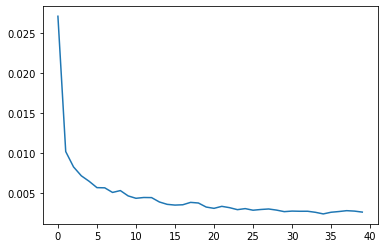

In [368]:
plt.plot(hist.history['loss'])

In [369]:
n_features = scaled_train.shape[1]
predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :],[[current_pred]], axis=1)

In [370]:
predictions = scaler.inverse_transform(predictions)

In [371]:
pred_df = pd.DataFrame(data=predictions, index=test.index, columns=test.columns)

In [372]:
columns = pred_df.columns

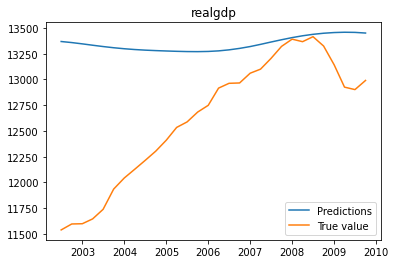

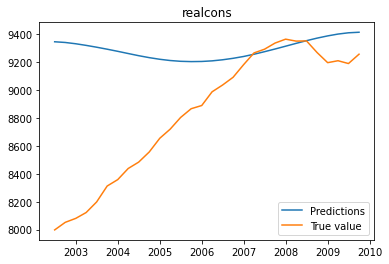

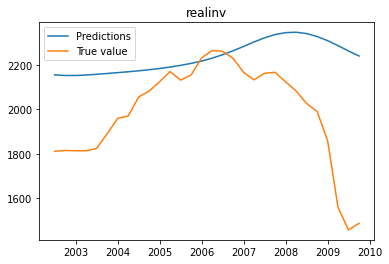

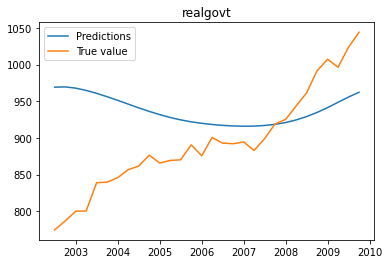

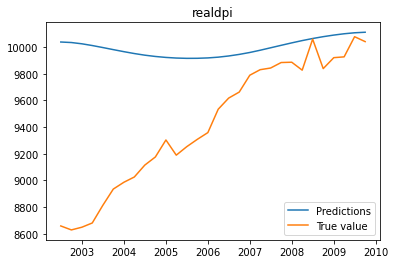

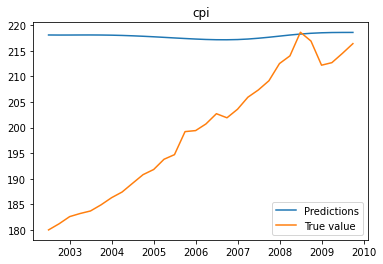

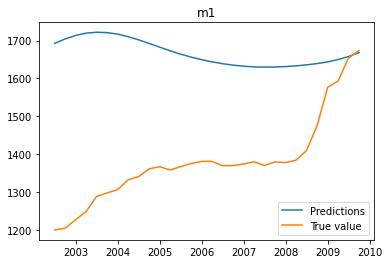

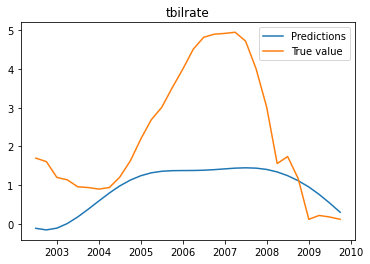

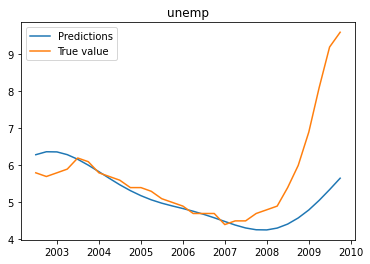

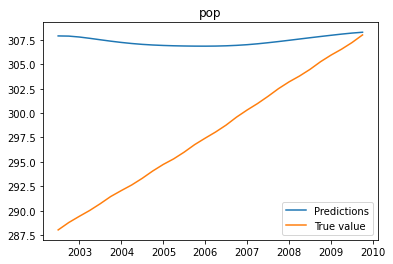

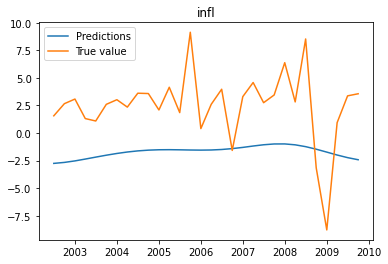

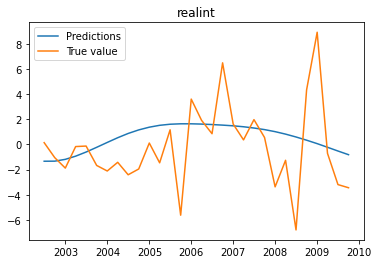

In [373]:
for col in columns:
    plt.plot(pred_df[col], label='Predictions')
    plt.plot(test[col], label='True value')
    plt.title(col)
    plt.legend()
    plt.show()